In [2]:
import pandas as pd
import datetime as datetime

data = pd.read_csv("distribution_board_data/elevator.csv", header=None)
data.columns = ['Datetime', 'Energy']
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.head()


,Datetime,Energy
0,2017-01-01 03:29:00,0.0
1,2017-01-01 03:30:00,0.0
2,2017-01-01 03:31:00,0.0
3,2017-01-01 03:32:00,0.0
4,2017-01-01 03:33:00,0.0


In [3]:
data['Date'] = data['Datetime'].apply(lambda x: x.date())
data['Time'] = data['Datetime'].apply(lambda x: x.time())
data['year'] = data['Datetime'].apply(lambda x: x.year)     
data['month'] = data['Datetime'].apply(lambda x: x.month)
data['day'] = data['Datetime'].apply(lambda x: x.day)
data['hour'] = data['Datetime'].apply(lambda x: x.hour)
data.head()

,Datetime,Energy,Date,Time,year,month,day,hour
0,2017-01-01 03:29:00,0.0,2017-01-01,03:29:00,2017,1,1,3
1,2017-01-01 03:30:00,0.0,2017-01-01,03:30:00,2017,1,1,3
2,2017-01-01 03:31:00,0.0,2017-01-01,03:31:00,2017,1,1,3
3,2017-01-01 03:32:00,0.0,2017-01-01,03:32:00,2017,1,1,3
4,2017-01-01 03:33:00,0.0,2017-01-01,03:33:00,2017,1,1,3


In [5]:
daily_average = data.groupby('Date').mean()

In [6]:
daily_average.head()

,Energy,year,month,day,hour
Date,,,,,
2017-01-01,0.0,2017.0,1.0,1.0,13.235581
2017-01-02,0.0,2017.0,1.0,2.0,11.500000
2017-01-03,0.0,2017.0,1.0,3.0,11.500000
2017-01-04,0.0,2017.0,1.0,4.0,11.500000
2017-01-05,0.0,2017.0,1.0,5.0,11.496178


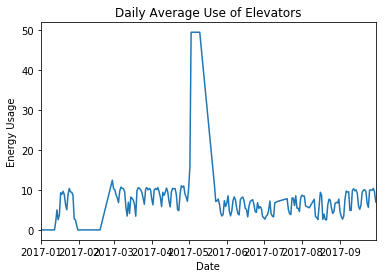

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
daily_average['Energy'].plot()
plt.title("Daily Average Use of Elevators")
plt.ylabel("Energy Usage")
plt.show()

# implement daily average graph process for all distribution boards

3rd floor lighting and plugs.csv
4th floor lighting and plugs.csv
4th floor mechanical 2nd,3rd,5th lighting and plugs.csv
6th floor lighting and plugs.csv
7th floor lighting and plugs.csv
7th floor mechanical, 8th and 9th lighting and plugs.csv
cellar power and lighting.csv
elevator.csv
retail.csv
roof mechanical.csv
sub-cellar power and lighting.csv


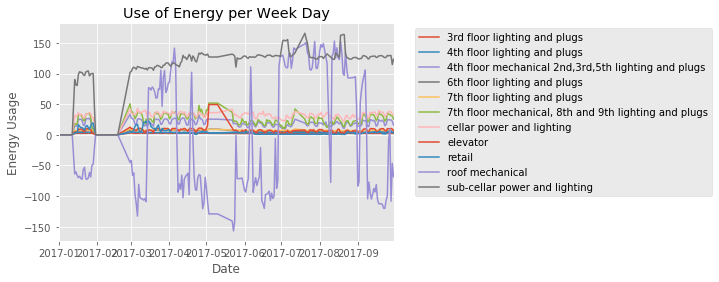

In [10]:

import pandas as pd
import datetime as datetime
import calendar
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import os

plt.figure()
plt.title("Use of Energy per Week Day" )
        
board_dfs = {}
directory = 'distribution_board_data/'
for dirname, directories, filenames in os.walk(directory):
    for filename in filenames:
        print( filename )

        data = pd.read_csv("{}{}".format(directory, filename), header=None)
        data.columns = ['Datetime', '{}'.format(filename[:-4])]
        data['Datetime'] = pd.to_datetime(data['Datetime'])
        data['Date'] = data['Datetime'].apply(lambda x: x.date())
        data['Time'] = data['Datetime'].apply(lambda x: x.time())
        data['year'] = data['Datetime'].apply(lambda x: x.year)     
        data['month'] = data['Datetime'].apply(lambda x: x.month)
        data['day'] = data['Datetime'].apply(lambda x: x.day)
        data['hour'] = data['Datetime'].apply(lambda x: x.hour)
        data['Weekday'] = data['Datetime'].apply(lambda x: calendar.day_name[x.weekday()])
        
        board_dfs['{}'.format(filename[:-4])] = data
        
        daily_average = board_dfs['{}'.format(filename[:-4])].groupby('Date').mean()
        daily_average['{}'.format(filename[:-4])].plot( legend='{}'.format(filename[:-4]) )   

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.ylabel("Energy Usage")
plt.show()

In [47]:
all_data = pd.concat( [ df[['Weekday', board]].groupby('Weekday').mean() for board, df in board_dfs.items() ], axis=1 )
all_data


,elevator,6th floor lighting and plugs,4th floor lighting and plugs,cellar power and lighting,7th floor lighting and plugs,retail,3rd floor lighting and plugs,sub-cellar power and lighting,"4th floor mechanical 2nd,3rd,5th lighting and plugs","7th floor mechanical, 8th and 9th lighting and plugs",roof mechanical
Weekday,,,,,,,,,,,
Friday,8.328514,6.044948,3.311781,29.194691,6.878240,3.486912,2.176721,114.346427,17.568805,23.568428,-10.046779
Monday,8.403689,6.146912,3.268812,30.977327,6.825694,3.659984,2.157966,114.026493,18.714627,26.402481,-20.619751
Saturday,6.809950,6.018286,3.191496,27.793622,6.808388,3.564360,2.173343,114.470638,13.934301,20.072222,-31.246053
Sunday,5.929121,5.993721,3.163313,27.640543,6.757464,3.444379,2.153316,113.388241,13.988639,20.336535,-23.758192
Thursday,9.428992,6.092775,3.329082,30.879341,6.934820,3.546547,2.219674,114.550750,19.586390,26.500568,1.459343
Tuesday,9.246741,6.170739,3.232167,31.042658,6.991452,3.615017,2.181153,113.080221,20.042826,27.724424,-6.842340
Wednesday,9.534556,6.151734,3.296576,31.294789,7.030143,3.612984,2.208041,112.919163,20.128937,27.659879,-1.606055


In [48]:
all_data = all_data.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

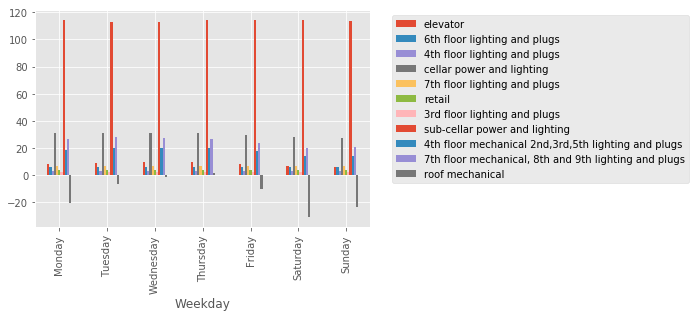

In [49]:
ax1 = all_data.plot.bar()
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)

In [50]:
for col in all_data:
    all_data[col] = 100*all_data[col] /  all_data[col].max()

all_data = all_data.clip(0,100)

In [51]:
all_data

,elevator,6th floor lighting and plugs,4th floor lighting and plugs,cellar power and lighting,7th floor lighting and plugs,retail,3rd floor lighting and plugs,sub-cellar power and lighting,"4th floor mechanical 2nd,3rd,5th lighting and plugs","7th floor mechanical, 8th and 9th lighting and plugs",roof mechanical
Weekday,,,,,,,,,,,
Monday,88.139277,99.613868,98.189602,98.985576,97.091820,100.000000,97.219937,99.542336,92.973749,95.231848,0.0
Tuesday,96.981353,100.000000,97.088851,99.194334,99.449639,98.771367,98.264569,98.716264,99.572205,100.000000,0.0
Wednesday,100.000000,99.692018,99.023568,100.000000,100.000000,98.715834,99.475885,98.575665,100.000000,99.767191,0.0
Thursday,98.892831,98.736560,100.000000,98.672468,98.644076,96.900593,100.000000,100.000000,97.304643,95.585642,100.0
Friday,87.350832,97.961495,99.480310,93.289303,97.839260,95.271213,98.064875,99.821631,87.281336,85.009621,0.0
Saturday,71.423887,97.529420,95.867162,88.812299,96.845655,97.387306,97.912701,99.930065,69.225219,72.399057,0.0
Sunday,62.185605,97.131336,95.020593,88.323146,96.121295,94.109114,97.010437,98.985159,69.495170,73.352417,0.0


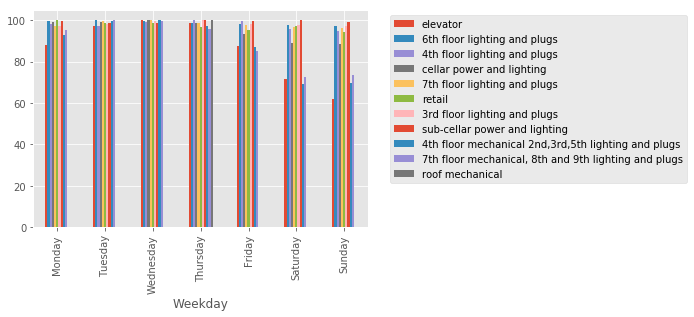

In [52]:
ax1 = all_data.plot.bar()
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)

In [67]:
100 - all_data.loc[['Sunday', 'Saturday']]

,elevator,6th floor lighting and plugs,4th floor lighting and plugs,cellar power and lighting,7th floor lighting and plugs,retail,3rd floor lighting and plugs,sub-cellar power and lighting,"4th floor mechanical 2nd,3rd,5th lighting and plugs","7th floor mechanical, 8th and 9th lighting and plugs",roof mechanical
Weekday,,,,,,,,,,,
Sunday,37.814395,2.868664,4.979407,11.676854,3.878705,5.890886,2.989563,1.014841,30.504830,26.647583,100.0
Saturday,28.576113,2.470580,4.132838,11.187701,3.154345,2.612694,2.087299,0.069935,30.774781,27.600943,100.0


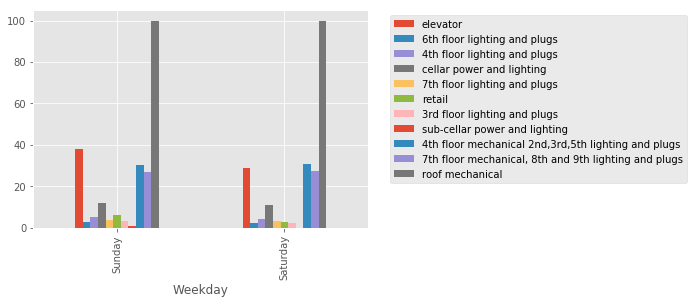

In [69]:
ax2 = (100 - all_data.loc[['Sunday', 'Saturday']]).plot.bar()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
